In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pysentani as sti
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')
survey['access_type'] = sti.access_type(survey)

In [2]:
for app in ['TV', 'radio', 'fridge', 'fan', 'rice_cooker', 'lighting']:
    # generate column labels for each appliance
    wk_col = 'app_{}_per_wk'.format(app)
    hr_col = 'app_{}_hrs'.format(app)
    # if null or within range use value, otherwise use max possible value
    survey[hr_col] = survey[hr_col].where(survey[hr_col].isnull() | (survey[hr_col] <= 24), 24)
    survey[wk_col] = survey[wk_col].where(survey[wk_col].isnull() | (survey[wk_col] <= 7), 7)

    # ensure non-null values are within bounds
    assert(all(survey[wk_col].dropna() <= 7))
    assert(all(survey[wk_col].dropna() >= 0))
    assert(all(survey[hr_col].dropna() <= 24))
    assert(all(survey[hr_col].dropna() >= 0))

In [3]:
powers = {'TV':0.040, 'fridge':0.100, 'radio':0.010, 'fan':0.050, 'rice_cooker':0.350, 'lighting':0.050}
appliance_list = ['TV', 'fridge', 'radio', 'fan', 'rice_cooker', 'lighting']

for appliance in appliance_list:
    # create column label from appliance names
    wk_col = 'app_{}_per_wk'.format(appliance)
    hr_col = 'app_{}_hrs'.format(appliance)
    energy_col = 'daily_{}_energy'.format(appliance)
    weekly_hr_col = 'weekly_{}_hrs'.format(appliance)
    survey[weekly_hr_col] = survey[wk_col] * survey[hr_col]    
    survey[energy_col] = survey[weekly_hr_col] / 7 * powers[appliance]

In [4]:
columns = ['access_type',
           'village_name',
           'daily_lighting_energy',
           'daily_TV_energy',
           'daily_radio_energy', 
           'daily_fridge_energy', 
           'daily_rice_cooker_energy',
           'daily_fan_energy']


In [14]:
survey[columns].fillna(0).head()

,access_type,village_name,daily_lighting_energy,daily_TV_energy,daily_radio_energy,daily_fridge_energy,daily_rice_cooker_energy,daily_fan_energy
0,no_access,Puai,0.000000,0.160000,0.020000,0,0,0
1,no_access,Abar,0.042857,0.080000,0.008571,0,0,0
2,no_access,Abar,0.000000,0.120000,0.000000,0,0,0
3,no_access,Abar,0.114286,0.022857,0.000000,0,0,0
4,no_access,Abar,0.300000,0.000000,0.000000,0,0,0


In [15]:
survey['Avg_Daily_Energy'] = energy_data.sum(axis=1)
energy_data.head()

,access_type,village_name,daily_lighting_energy,daily_TV_energy,daily_radio_energy,daily_fridge_energy,daily_rice_cooker_energy,daily_fan_energy,Avg_Daily_Energy
0,no_access,Puai,0.000000,0.160000,0.020000,0,0,0,0.180000
1,no_access,Abar,0.042857,0.080000,0.008571,0,0,0,0.131429
2,no_access,Abar,0.000000,0.120000,0.000000,0,0,0,0.120000
3,no_access,Abar,0.114286,0.022857,0.000000,0,0,0,0.137143
4,no_access,Abar,0.300000,0.000000,0.000000,0,0,0,0.300000


In [16]:
wk_columns = ['Avg_Daily_Energy']
id_columns = ['access_type']

columns = wk_columns + id_columns
plt_data = pd.melt(survey[columns], value_vars=wk_columns, id_vars=id_columns)

In [17]:
plt_data.head()

,access_type,variable,value
0,no_access,Avg_Daily_Energy,0.360000
1,no_access,Avg_Daily_Energy,0.262857
2,no_access,Avg_Daily_Energy,0.240000
3,no_access,Avg_Daily_Energy,0.274286
4,no_access,Avg_Daily_Energy,0.600000


(0, 10)

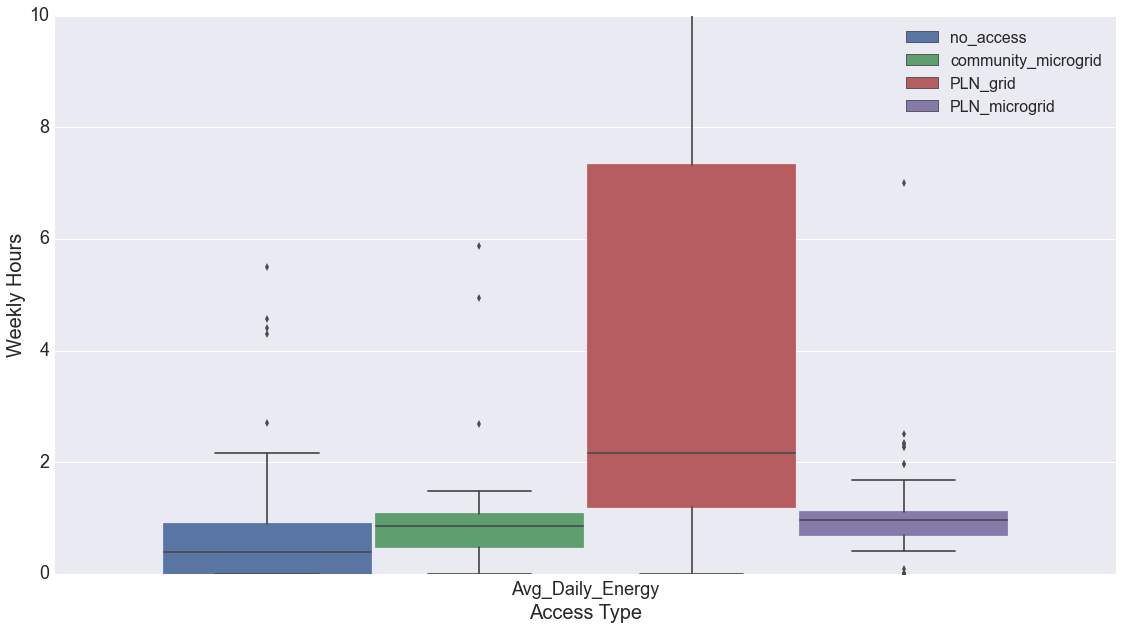

In [25]:
plt.figure(figsize=(19,10))
sns.boxplot(data=plt_data, hue='access_type', y='value', x='variable')
            #order=['PLN Grid','PLN Microgrid','Community Microgrid','Non-Centralized'])
plt.ylabel('Weekly Hours', fontsize=20)
plt.xlabel('Access Type', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(prop={'size':16})
plt.ylim(0, 10)
#plt.savefig('appliance-hours.pdf')